In [47]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import atomic_info
import sklearn
import seaborn as sns
plt.style.use('classic')
%matplotlib inline
print(plt.style.available)

['seaborn-darkgrid', 'grayscale', 'seaborn-colorblind', 'seaborn-paper', 'seaborn-dark', 'ggplot', 'seaborn-deep', 'seaborn-whitegrid', 'bmh', 'seaborn-notebook', 'seaborn-pastel', 'seaborn-talk', 'seaborn-bright', 'dark_background', 'seaborn-poster', 'fivethirtyeight', 'seaborn-ticks', 'classic', 'seaborn-dark-palette', 'seaborn-muted', 'seaborn-white']


In [2]:
#atomic_info.element.atomic_mass['Ge']

In [3]:
band_gap = open('band_gap.dat','r')
BandGap_cont = band_gap.readlines()

In [4]:
BandGap_dic = {}
BandGap_list = []
for line in BandGap_cont:
    BandGap_dic[line.split()[1]]=float(line.split()[2])
    BandGap_list.append((line.split()[0],line.split()[1],float(line.split()[2])))

In [5]:
gap_df=pd.DataFrame(BandGap_list,columns=['Compound','Phase','Band gap (eV)'])
gap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
Compound         118 non-null object
Phase            118 non-null object
Band gap (eV)    118 non-null float64
dtypes: float64(1), object(2)
memory usage: 2.8+ KB


___
### First, let's have a look at the compounds with zero band gaps (metals):
___

In [6]:
# find compound with zero band gap:
gap_df[gap_df['Band gap (eV)']==0]

,Compound,Phase,Band gap (eV)
1,N,N_2,0.0
6,As,As_2,0.0
9,Bis,Bis_0,0.0
10,Bis,Bis_1,0.0
13,BF,BF_2,0.0
14,BCl,BCl_0,0.0
16,BCl,BCl_2,0.0
19,BBr,BBr_2,0.0
24,AlF,AlF_1,0.0
25,AlF,AlF_2,0.0


___
### The optimized structures of compounds above are different from initial inputs. 

For example:

1. Bis: both Bis_1 and Bis_0 have quasi-cubic structure, symmetry quite different from Black P and Blue P
<img src="structure_images/Bis_1_top.png">

2. BCl: BCl_0 has a 2D flat structure, also different from that of Black P:
<img src="structure_images/BCl_0_side.png">

3. CS_2 and CSe_2 do not favor cubic structure, which converts to a 2D flat sheet:
<img src="structure_images/CS_2_side.png">
___

In [55]:
#
# calculate the mass of the compound
#
def calc_average_mass(compound_name):
    elem_list=atomic_info.count_elem(compound_name)
    if len(elem_list)==1:
        if elem_list[0]=='Bi':
            return atomic_info.element.atomic_mass['Bis']
        else:
            return atomic_info.element.atomic_mass[elem_list[0]]
    else:
        return 0.5*(atomic_info.element.atomic_mass[elem_list[0]]+atomic_info.element.atomic_mass[elem_list[1]])
#calc_average_mass('GeS')

In [21]:
#
# this function can calculate elec_negativity difference in a compound
#
def calc_elec_neg_diff(compound_name):
    elem_list=atomic_info.count_elem(compound_name)
    if len(elem_list)==1:
        return 0
    else:
        return abs(atomic_info.element.atomic_elec_neg[elem_list[0]]-atomic_info.element.atomic_elec_neg[elem_list[1]])
#calc_elec_neg_diff('GeS')
#atomic_info.element.

In [67]:
#
# add more features
#
# tag the compound with 'V','IV-VI', and 'IIV-VII'
def obt_group(compound_name):
    elem_list=atomic_info.count_elem(compound_name)
    if len(elem_list)==1:
        return 'V'
    else:
        if compound_name in atomic_info.compound_III_VII:
            return 'III-VII'
        if compound_name in atomic_info.compound_IV_VI:
            return 'IV-VI'
#obt_group('Bis')

In [129]:
def obt_radius(compound_name):
    elem_list=atomic_info.count_elem(compound_name)
    if len(elem_list)==1:
        return atomic_info.element.atomic_radius[elem_list[0]]    
    else:
        return 0.5*(atomic_info.element.atomic_radius[elem_list[0]]+atomic_info.element.atomic_radius[elem_list[1]])
#obt_radius('GeS')

In [90]:
#
# get the phase of the compound
# take GeS_0 for example:
# input 'GeS_0'
# return 0
#
def obt_phase(phase_string):
    phase = int(phase_string.split('_')[-1])
    return phase
#obt_phase('GeS_0')

In [88]:
#
# then, we can use the function above to put electronegativity difference into our dataframe
#
#gap_df['Elec_Neg_diff']=[0]*118
gap_df['Elec_Neg_diff']=gap_df['Compound'].map(lambda x: calc_elec_neg_diff(x))
#gap_df['Elec_Neg_diff']
#gap_df

In [22]:
#gap_df[gap_df['Band gap (eV)']>3.7]

In [59]:
#
# add compound mass into the data frame
# 
gap_df['Compound mass']=gap_df['Compound'].map(lambda x: calc_average_mass(x))
#gap_df

In [79]:
#
# add compound type into the data frame: V, IV-VI, III-VII
#
gap_df['Compound type']=gap_df['Compound'].map(lambda x: obt_group(x))
#gap_df

In [132]:
#
# add phase of the compound into the dataframe
#
gap_df['Phase index']=gap_df['Phase'].map(lambda x: obt_phase(x))
#gap_df

In [133]:
#
# add average atomic radius of the compound
#
gap_df['Average radius']=gap_df['Compound'].map(lambda x: obt_radius(x))
#gap_df.head()

,Compound,Phase,Band gap (eV),Elec_Neg_diff,Compound mass,Compound type,Phase index,Average radius
0,N,N_1,3.880865,0.0,14.0067,V,1,56.0
1,N,N_2,0.000000,0.0,14.0067,V,2,56.0
2,P,P_0,0.902202,0.0,30.9738,V,0,98.0
3,P,P_1,1.933175,0.0,30.9738,V,1,98.0
4,As,As_0,0.806833,0.0,74.9216,V,0,114.0


([<matplotlib.axis.YTick at 0x11afdeb38>,
 <a list of 5 Text yticklabel objects>)

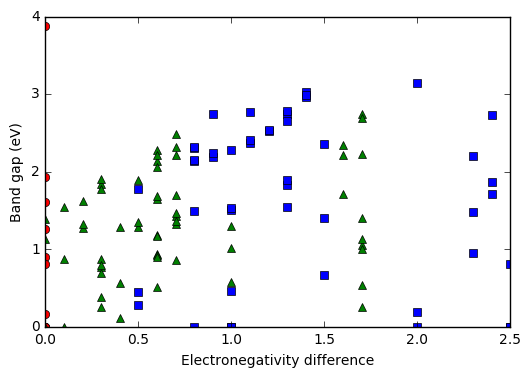

In [86]:
#
# plot Band gap value as a function of electronegativity difference
#
ls_type={'V':'ro','IV-VI':'g^','III-VII':'bs'}
plt.plot(gap_df[gap_df['Compound type']=='V']['Elec_Neg_diff'],
         gap_df[gap_df['Compound type']=='V']['Band gap (eV)'],'ro')
plt.plot(gap_df[gap_df['Compound type']=='IV-VI']['Elec_Neg_diff'],gap_df[gap_df['Compound type']=='IV-VI']['Band gap (eV)'],'g^')
plt.plot(gap_df[gap_df['Compound type']=='III-VII']['Elec_Neg_diff'],gap_df[gap_df['Compound type']=='III-VII']['Band gap (eV)'],'bs')
plt.xlabel('Electronegativity difference')
plt.ylabel('Band gap (eV)')
plt.yticks([0,1,2,3,4])

___
#### Linear plotting with Seaborn
___

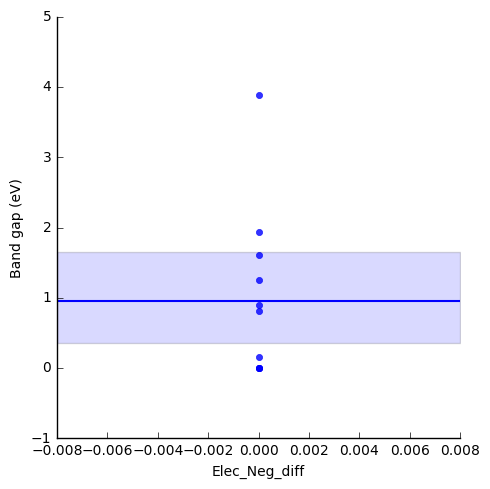

In [72]:
sns.lmplot('Elec_Neg_diff','Band gap (eV)',gap_df[gap_df['Compound type']=='V'])

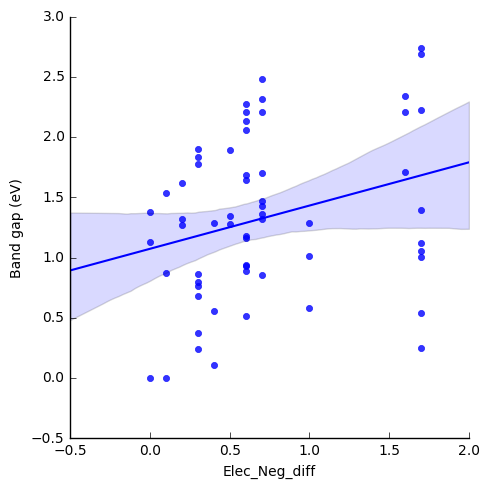

In [73]:
sns.lmplot('Elec_Neg_diff','Band gap (eV)',gap_df[gap_df['Compound type']=='IV-VI'])

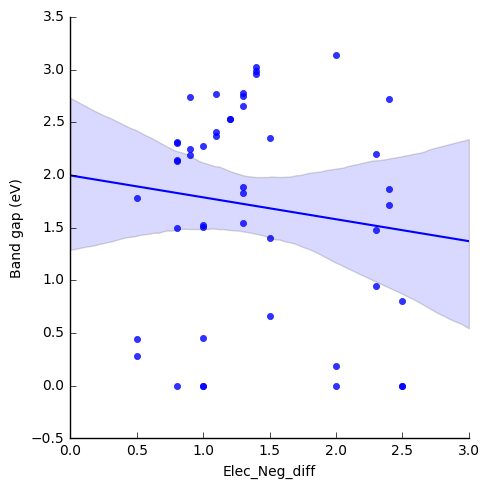

In [75]:
sns.lmplot('Elec_Neg_diff','Band gap (eV)',gap_df[gap_df['Compound type']=='III-VII'])

([<matplotlib.axis.YTick at 0x1190176a0>,
 <a list of 5 Text yticklabel objects>)

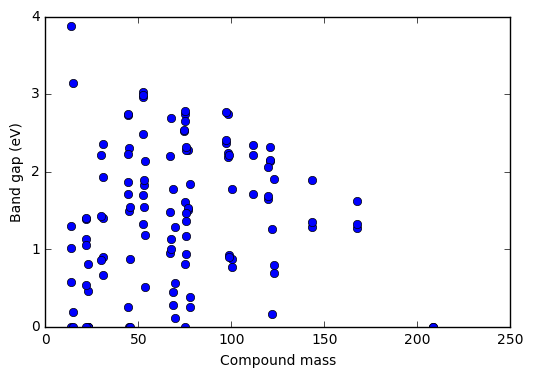

In [60]:
# Band gap Vs Mass
plt.plot(gap_df['Compound mass'],gap_df['Band gap (eV)'],'o')
plt.xlabel('Compound mass')
plt.ylabel('Band gap (eV)')
plt.yticks([0,1,2,3,4])

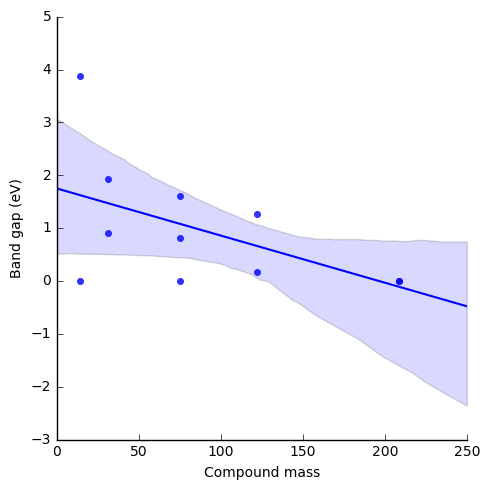

In [76]:
sns.lmplot('Compound mass','Band gap (eV)',gap_df[gap_df['Compound type']=='V'])

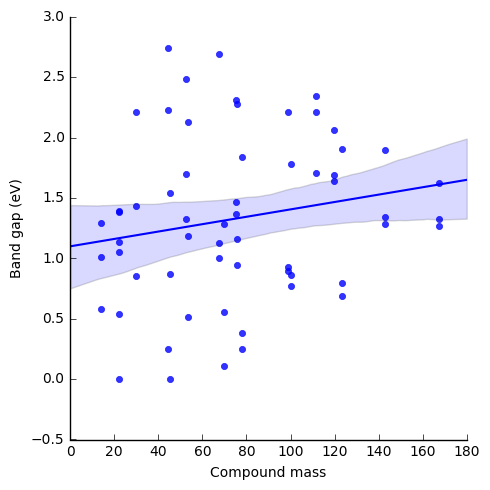

In [77]:
sns.lmplot('Compound mass','Band gap (eV)',gap_df[gap_df['Compound type']=='IV-VI'])

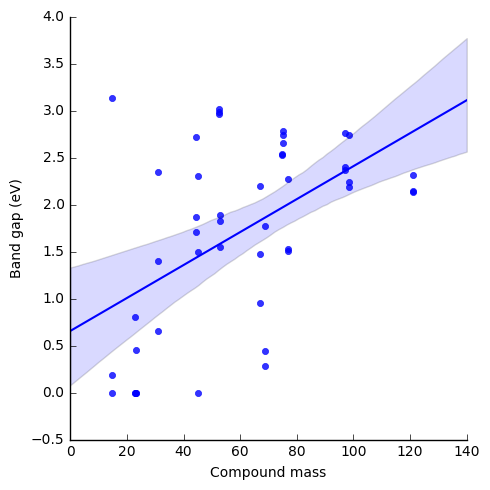

In [78]:
sns.lmplot('Compound mass','Band gap (eV)',gap_df[gap_df['Compound type']=='III-VII'])

(-0.5, 2.5)

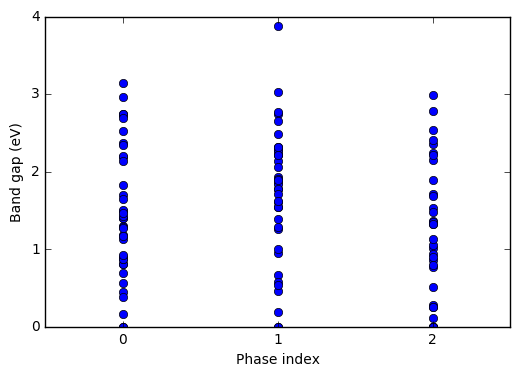

In [99]:
# plot the band gap with respect to structural phases
plt.plot(gap_df['Phase index'],gap_df['Band gap (eV)'],'o')
plt.xlabel('Phase index')
plt.ylabel('Band gap (eV)')
plt.yticks([0,1,2,3,4])
plt.xticks([0,1,2])
plt.xlim((-0.5,2.5))

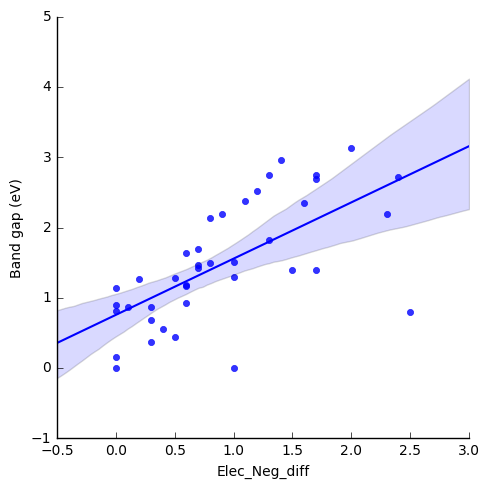

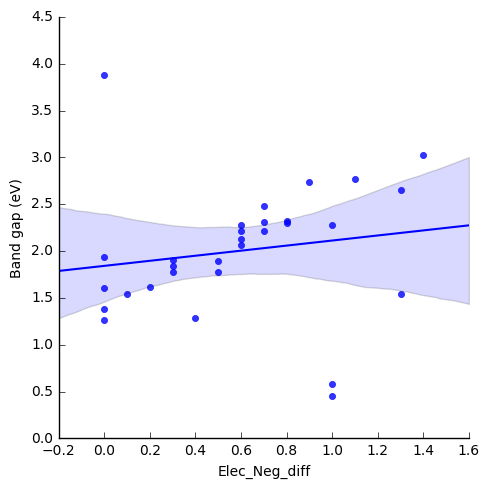

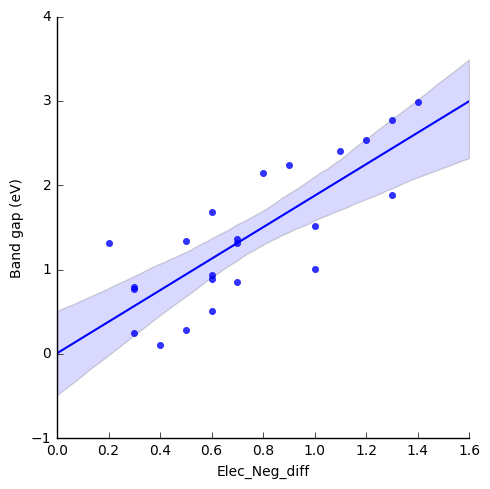

In [114]:
sns.lmplot('Elec_Neg_diff','Band gap (eV)',gap_df[gap_df['Phase index']==0])
sns.lmplot('Elec_Neg_diff','Band gap (eV)',gap_df[(gap_df['Phase index']==1) & (gap_df['Elec_Neg_diff']<1.5) & (gap_df['Band gap (eV)']>0)])
sns.lmplot('Elec_Neg_diff','Band gap (eV)',gap_df[(gap_df['Phase index']==2) & (gap_df['Elec_Neg_diff']<1.5) & (gap_df['Band gap (eV)']>0)])

___
### Correlation between band-gap values with electronegativity difference:
___

In [126]:
gap_df.head()

,Compound,Phase,Band gap (eV),Elec_Neg_diff,Compound mass,Compound type,Phase index
0,N,N_1,3.880865,0.0,14.0067,V,1
1,N,N_2,0.000000,0.0,14.0067,V,2
2,P,P_0,0.902202,0.0,30.9738,V,0
3,P,P_1,1.933175,0.0,30.9738,V,1
4,As,As_0,0.806833,0.0,74.9216,V,0


In [116]:
#sns.lmplot('Compound mass','Band gap (eV)',gap_df[gap_df[['Phase index'],['Compound type']]==[0,'V']])
#sns.lmplot('Compound mass','Band gap (eV)',gap_df[gap_df['Phase index']==1])
#sns.lmplot('Compound mass','Band gap (eV)',gap_df[gap_df['Phase index']==2])

In [122]:
#gap_df[['Compound mass','Elec_Neg_diff','Phase index']]

___
### Linear regression model
___

In [134]:
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(gap_df[['Elec_Neg_diff','Compound mass','Phase index','Average radius']],gap_df['Band gap (eV)'],test_size=0.2)
gap_linear=lm.LinearRegression()
gap_linear.fit(X_train, Y_train)
predict_gap=gap_linear.predict(X_test)

In [146]:
print(gap_linear.coef_)
print(gap_linear.intercept_)

[ 0.36992416 -0.00483363 -0.22645096  0.02216003]
-0.610066158221


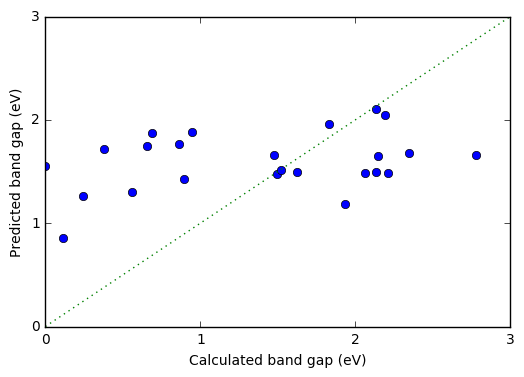

In [142]:
plt.plot(Y_test, predict_gap,'o')
plt.ylim((0,3))
plt.xticks([0,1,2,3])
plt.yticks([0,1,2,3])
plt.xlabel('Calculated band gap (eV)')
plt.ylabel('Predicted band gap (eV)')
plt.plot([0,3],[0,3],':')

___
### Results analysis for linear regression model:
1. E_gap = 0.36992416ElecNeg_diff -0.00483363Compound_mass -0.22645096Phase_index + 0.02216003Average_Radius - 0.61
2. From above equation, we can still conclude that (a) the band gap would increase along with the electronegativity difference; (b) the heavier the compounds (the larger they will be), the band gaps become smaller. 
3. For the full set of data, linear regression does not work very well for band gap prediction.
___

___
### Random forrest regression
___

In [191]:
from sklearn.ensemble import RandomForestRegressor
X1 = gap_df[['Elec_Neg_diff','Compound mass','Phase index','Average radius']]
Y1 = gap_df['Band gap (eV)']

In [335]:

X_train, X_test, Y_train, Y_test = train_test_split(X1,Y1,
                                                    test_size=0.2, random_state=35)
gap_RFR = RandomForestRegressor()
gap_RFR.fit(X_train,Y_train)
gap_predict_RFR=gap_RFR.predict(X_test)

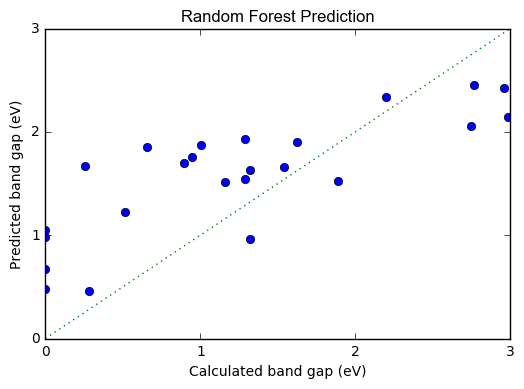

In [336]:
plt.plot(Y_test, gap_predict_RFR,'o')
plt.ylim((0,3))
plt.xticks([0,1,2,3])
plt.yticks([0,1,2,3])
plt.xlabel('Calculated band gap (eV)')
plt.ylabel('Predicted band gap (eV)')
plt.plot([0,3],[0,3],':')
plt.title('Random Forest Prediction')

___
### We can drop some outliers (i):
First, zero-band-gap structures: these structures are highly reconstructed and are unlikely to follow the trend of these groupd of 2D semiconductors
___

In [292]:
X2 = gap_df[gap_df['Band gap (eV)']>0][['Elec_Neg_diff','Compound mass','Phase index','Average radius']]
Y2 = gap_df[gap_df['Band gap (eV)']>0]['Band gap (eV)']
#len(X2)

In [333]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X,Y,test_size=0.2,random_state=35)
gap_RFR2 = RandomForestRegressor(n_estimators=5)
gap_RFR2.fit(X_train,Y_train)
gap_predict_RFR2=gap_RFR2.predict(X_test2)

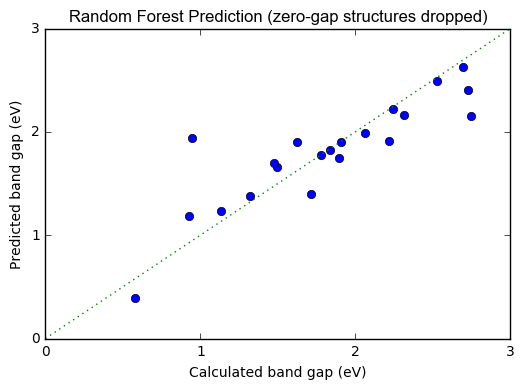

In [334]:
plt.plot(Y_test2, gap_predict_RFR2,'o')
plt.ylim((0,3))
plt.xticks([0,1,2,3])
plt.yticks([0,1,2,3])
plt.xlim((0,3))
plt.ylim((0,3))
plt.xlabel('Calculated band gap (eV)')
plt.ylabel('Predicted band gap (eV)')
plt.plot([0,3],[0,3],':')
plt.title('Random Forest Prediction (zero-gap structures dropped)')

___
### We can drop some outliers (ii):
Second, remove data points with Elec_Neg_diff > 1.5.
___

In [306]:
X3 = gap_df[(gap_df['Band gap (eV)']>0) & (gap_df['Elec_Neg_diff']<1.5)][['Elec_Neg_diff','Compound mass','Phase index','Average radius']]
Y3 = gap_df[(gap_df['Band gap (eV)']>0) & (gap_df['Elec_Neg_diff']<1.5)]['Band gap (eV)']
#len(Y3)

In [329]:
X_train3, X_test3, Y_train3, Y_test3=train_test_split(X3,Y3,test_size=0.2,random_state=35)
gap_RFR3 = RandomForestRegressor(n_estimators=5)
gap_RFR3.fit(X_train3,Y_train3)
gap_predict_RFR3=gap_RFR3.predict(X_test3)

In [330]:
#X_test3

In [331]:
#X_test

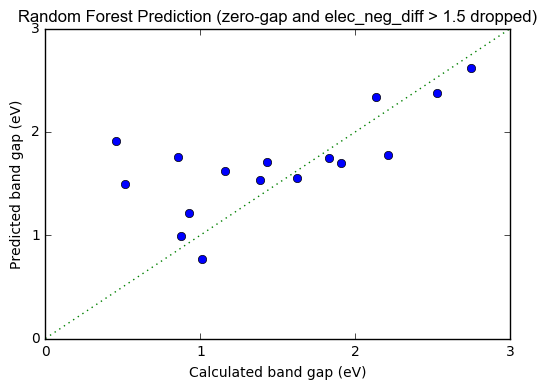

In [332]:
plt.plot(Y_test3, gap_predict_RFR3,'o')
plt.ylim((0,3))
plt.xticks([0,1,2,3])
plt.yticks([0,1,2,3])
plt.xlim((0,3))
plt.ylim((0,3))
plt.xlabel('Calculated band gap (eV)')
plt.ylabel('Predicted band gap (eV)')
plt.plot([0,3],[0,3],':')
plt.title('Random Forest Prediction (zero-gap and elec_neg_diff > 1.5 dropped)')

___
### Cross validation
___

In [185]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [194]:
gap_RFR_cv = RandomForestRegressor()

In [276]:
# for full data set
scores_full = cross_val_score(gap_RFR_cv,X1,Y1,cv=3)

In [277]:
[scores_full.min(),scores_full.max(),sum(abs(scores_full))/3.]

[-0.13449715620179648, 0.34872285094360289, 0.26244143632792694]

In [278]:
# drop gap values = 0
scores_2 = cross_val_score(gap_RFR_cv,X2,Y2,cv=3)

In [279]:
[scores_2.min(),scores_2.max(),sum(abs(scores_2))/3]

[-0.014782020358620418, 0.33172852770725081, 0.2181530819062493]

In [280]:
# drop gap values = 0 and elec_neg_diff > 1.5
scores_3 = cross_val_score(gap_RFR_cv,X2,Y2,cv=3)

In [281]:
[scores_3.min(),scores_3.max(),sum(abs(scores_3))/3]

[0.17910725097242233, 0.3967396079755543, 0.27580980672315036]

___
### Support vector machine
___